Автор: Баранов Д.А. ИВТ 2.1

Лабораторная работа №1
Линейная регрессия - Insurance (Medical Cost Personal Datasets)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model, metrics, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import Lasso

In [2]:
data = pd.read_csv('/content/insurance.csv')

# Перекодировка признаков
data['smoker'] = data['smoker'].apply(lambda x: 0 if x == 'no' else 1)
data['sex'] = data['sex'].apply(lambda x: 0 if x == 'female' else 1)

# One-hot
data = pd.get_dummies(data, drop_first = True)

# Разделение
X = data.drop('charges', axis = 1)
y = data['charges']

Задание 1: Разделение выборки

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print("Количество наблюдений в тестовой выборке:", len(y_test))

Количество наблюдений в тестовой выборке: 268


Задание 2: Линейная регрессия

In [5]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

print("Свободный член (intercept):", round(model.intercept_, 2))

# Предсказания
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Метрики
def print_metrics(y_true, y_pred, label = ''):
  R2 = metrics.r2_score(y_true, y_pred)
  MAE = metrics.mean_absolute_error(y_true, y_pred)
  MAPE = metrics.mean_absolute_percentage_error(y_true, y_pred) * 100
  print(f"{label} R2: {R2:.3f}, MAE: {round(MAE)}, MAPE: {round(MAPE)}%")

print_metrics(y_train, y_train_pred, label = 'Train')
print_metrics(y_test, y_test_pred, label = 'Test')

Свободный член (intercept): -11931.22
Train R2: 0.742, MAE: 4208, MAPE: 42%
Test R2: 0.784, MAE: 4181, MAPE: 47%


Задание 3: Boxplot ошибок

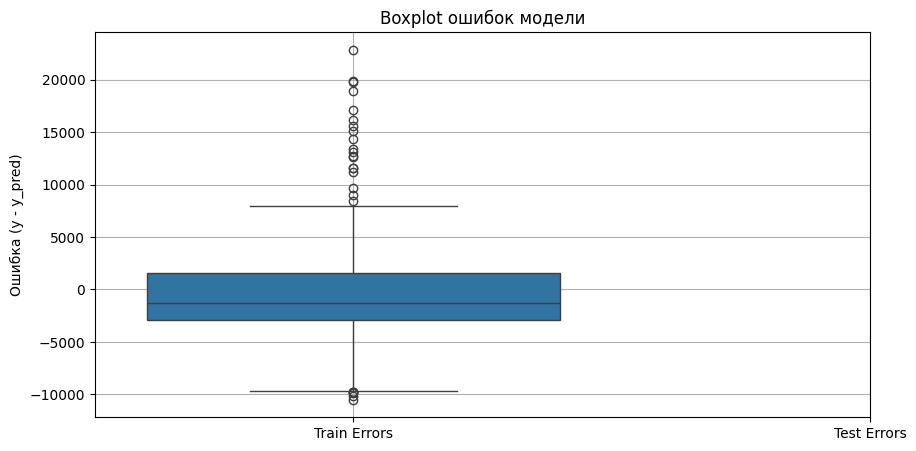

In [6]:
errors_train = y_train - y_train_pred
errors_test = y_test - y_test_pred

plt.figure(figsize = (10, 5))
sns.boxplot(data = [errors_train, errors_test], orient = 'v')
plt.xticks([0, 1], ['Train Errors', 'Test Errors'])
plt.title("Boxplot ошибок модели")
plt.ylabel("Ошибка (y - y_pred)")
plt.grid(True)
plt.show()

Задание 4: Нормализация и полиномиальные признаки

In [8]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

poly = PolynomialFeatures(degree = 2, include_bias = False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

print("Количество столбцов после генерации полиномиальных признаков: ", X_train_poly.shape[1])

Количество столбцов после генерации полиномиальных признаков:  44


Задание 5: Линейная регрессия на полиномиальных признаках

In [11]:
model_poly = linear_model.LinearRegression()
model_poly.fit(X_train_poly, y_train)

y_test_poly_pred = model_poly.predict(X_test_poly)
R2_poly = metrics.r2_score(y_test, y_test_poly_pred)

print("R2 на тестовой выборке:", round(R2_poly, 3))

R2 на тестовой выборке: 0.867


Задание 6: Коэффициенты и вывод

Максимальный по модулю коэффициент: 54839.212545003094


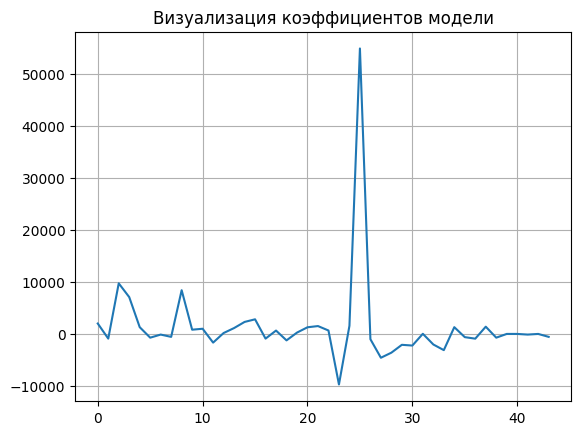

In [12]:
coefficients = model_poly.coef_
print("Максимальный по модулю коэффициент:", np.max(np.abs(coefficients)))

plt.plot(coefficients)
plt.title("Визуализация коэффициентов модели")
plt.grid(True)
plt.show()

Задание 7: Lasso-регрессия

In [15]:
lasso = Lasso(alpha = 1.0, max_iter = 2000)
lasso.fit(X_train_poly, y_train)

y_test_lasso_pred = lasso.predict(X_test_poly)

r2_lasso = metrics.r2_score(y_test, y_test_lasso_pred)
MAE_lasso = metrics.mean_absolute_error(y_test, y_test_lasso_pred)
MAPE_lasso = metrics.mean_absolute_percentage_error(y_test, y_test_lasso_pred) * 100

print(f"LASSO R2: {r2_lasso:.3f}, MAE: {round(MAE_lasso)}, MAPE: {round(MAPE_lasso)}%")

LASSO R2: 0.867, MAE: 2717, MAPE: 30%
